In [ ]:
#coding = utf-8
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from torch import optim

#parameters
epochs = 2
batch_size = 100
lr = 0.01
download_mnist = True

train_data = torchvision.datasets.MNIST(
    root='./minst_data',
    train=True,
    transform = torchvision.transforms.ToTensor(),
    download=download_mnist
)

#plot one example
# print(train_data.data.size())
# print(train_data.targets.size())
# plt.imshow(train_data.data[0].numpy(),cmap = 'gray')
# plt.title('%i'%train_data.targets[0])
# plt.show()

train_loader =Data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)

test_data = torchvision.datasets.MNIST(root='./minst_data',train=False)
test_x = Variable(torch.unsqueeze(test_data.data,dim=1)).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets[:2000]

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(    #(1,28,28)1是channel的维度，28*28为图片的长宽
                in_channels=1,#图片的层数，RGB=3,灰度=1
                out_channels=16,#filter的个数
                kernel_size=5,#filter的长宽
                stride=1,#每隔多少个移动
                padding=2,#图片补0.if stride = 1,padding =(kernel_size-1)/2 = (5-1)/2 = 2
            ),   #-->（16，28，28）
            nn.ReLU(),#-->（16，28，28）
            nn.MaxPool2d(kernel_size=2),#可以看成2*2的filter    #-->（16，14，14）kernel_size = 2,减小一半
        )
        self.conv2 = nn.Sequential(#-->（16，14，14）
            nn.Conv2d(16,32,5,1,2),#-->（32，14，14）
            nn.ReLU(),#-->（32，14，14）
            nn.MaxPool2d(2)#-->（32，7，7）

        )
        self.out = nn.Linear(32*7*7,10)#输出为10类

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)   #-->(batch,32,7,7)
        x = x.view(x.size(0),-1) #-->(batch,32*7*7)
        output = self.out(x)
        return output

cnn = CNN()
print(cnn)

opimizer = optim.Adam(cnn.parameters(),lr=lr)

loss_func = nn.CrossEntropyLoss()

#train and test
for epoch in range(epochs):
    for step,(x,y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)

        out = cnn(b_x)
        loss = loss_func(out,b_y)
        opimizer.zero_grad()
        loss.backward()
        opimizer.step()

        if step % 50 == 0:
            test_out = cnn(test_x)
            pred_y = torch.max(test_out,1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y)/ test_y.size
            print('Epoch:',epoch,'|train loss:'+str(loss.item()),'|test accuracy:'+str(accuracy))

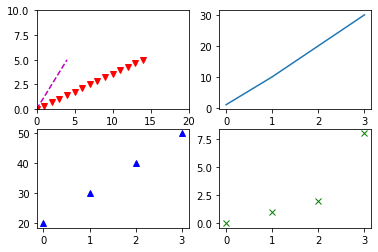

In [16]:
import matplotlib.pyplot as plt
import numpy as np
array_a = np.linspace(0 , 5, 5)
array_b = np.linspace(0 , 5, 15)
plt.figure()
plt.subplot(221)
plt.axis([0,20,0,10])
plt.plot(array_a,"m--")
plt.plot(array_b,"rv")
plt.subplot(222)
plt.plot([1,10,20,30])
plt.subplot(223)
plt.plot([20,30,40,50],"b^")
plt.subplot(224)
plt.plot([0,1,2,8],"gx")